In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
iris = pd.read_csv('Iris.csv')
iris.drop(['Id'], axis = 1, inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
trainX, testX, trainY, testY = train_test_split(iris.drop(['Species'], axis =1), iris.Species, test_size= 0.25, 
                                                stratify = iris['Species'])

In [13]:
parameters_test = {
    'n_estimators':[5,10,20,40,100],
    'criterion':['gini', 'entropy'],
    #'max_features':[int, float, 'sqrt', 'log2', None],
    'max_depth':[None, 3, 4, 10]
}

In [14]:
classificator = RandomForestClassifier(n_jobs=-1)

In [15]:
grid = GridSearchCV(estimator= classificator, param_grid= parameters_test, scoring= 'accuracy', n_jobs=-1)

In [16]:
grid.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 20, 40, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, 4, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [17]:
print(pd.DataFrame(grid.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.111754  8.138577e-04         0.112271    1.241047e-03   
1        0.113736  8.137158e-04         0.116601    1.693851e-03   
2        0.116061  3.291508e-03         0.120259    1.694516e-03   
3        0.126699  5.619580e-07         0.121921    6.743496e-07   
4        0.154746  2.859668e-03         0.103029    6.836514e-07   
5        0.110866  2.712222e-03         0.102361    2.326506e-04   
6        0.108206  8.141990e-04         0.103029    7.370010e-07   
7        0.113193  4.899036e-07         0.103029    8.778064e-07   
8        0.116367  9.570706e-04         0.103608    4.650503e-04   
9        0.142517  4.697970e-04         0.105031    9.413921e-04   
10       0.107747  2.973602e-07         0.102316    2.955963e-05   
11       0.110074  4.704150e-04         0.104899    1.072147e-06   
12       0.110038  4.694206e-04         0.104113    3.113491e-05   
13       0.115716  1.410683e-03         0.102954

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [18]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 20}


In [19]:
classificator = RandomForestClassifier(criterion='gini', n_estimators=20, n_jobs=-1)

In [20]:
classificator.fit(trainX, trainY)
predict = classificator.predict(testX)

In [21]:
print(confusion_matrix(testY, predict))
print(classification_report(testY, predict))

[[13  0  0]
 [ 0 11  2]
 [ 0  2 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.85      0.85      0.85        13
 Iris-virginica       0.83      0.83      0.83        12

      micro avg       0.89      0.89      0.89        38
      macro avg       0.89      0.89      0.89        38
   weighted avg       0.89      0.89      0.89        38



<BarContainer object of 4 artists>

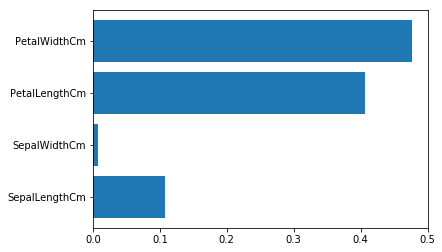

In [29]:
plt.barh(iris.columns[:-1], classificator.feature_importances_)

In [30]:
trainX, testX, trainY, testY = train_test_split(iris.drop(['Species', 'SepalWidthCm', 'SepalLengthCm'], axis =1), iris.Species, test_size= 0.25, 
                                                stratify = iris['Species'])

In [31]:
classificator = RandomForestClassifier(criterion='gini', n_estimators=20, n_jobs=-1)
classificator.fit(trainX, trainY)
predict = classificator.predict(testX)
print(confusion_matrix(testY, predict))
print(classification_report(testY, predict))

[[13  0  0]
 [ 0 12  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.92      1.00      0.96        12

      micro avg       0.97      0.97      0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

